In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from keras import optimizers

import FBNN2d
importlib.reload(FBNN2d)
from FBNN2d import *

In [9]:
(x_train,y_train) = gene_data(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=500,multi=100)
test_data=[gene_data(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100) for _ in range(5)]

print(x_train[0])
print(y_train[0])

[3.14367631e-17 1.89337190e-05 9.98377148e-01 1.60391787e-03
 1.37286498e-13 5.35202827e-30 3.37403769e-51 3.75663247e-75
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.19267506e-57 5.97129986e-35]
[ 7.56196031  1.28054827  5.94737326 16.11399323 15.21587253]


# 隠れ層の数とノード数

In [10]:
layers=range(1,11)
hiddens=range(50,1501,50)
res=[]
for layer in layers:
    print('\nlayer:',layer,'\nhidden:',end=" ")
    for hidden in hiddens:
        model=set_model(n_hidden=hidden,n_layer=layer,print_summary=False)
        model.fit(x_train, y_train, verbose=0, epochs=10, shuffle=True, validation_split=0.2
                    # ,batch_size=30,validation_data=(x_test, y_test)
                    )
        scores = [model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
        print(hidden, end=" ")
        score = np.mean(scores,axis=0)
        res.append([layer,hidden,score[0],score[1]])


layer: 1 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 
layer: 2 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 
layer: 3 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 
layer: 4 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 
layer: 5 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 
layer: 6 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 
layer: 7 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 11

In [11]:
data1 = pd.DataFrame(res, columns=["layer","hidden","loss(mse)","mae"])
display(data1.sort_values("loss(mse)"))
display(data1.sort_values("mae"))

,layer,hidden,loss(mse),mae
82,3,1150,19.153015,3.514218
148,5,1450,19.163619,3.500349
80,3,1050,19.227227,3.523944
138,5,950,19.382572,3.525201
83,3,1200,19.398148,3.527548
...,...,...,...,...
273,10,200,68.995598,6.295108
270,10,50,69.091547,6.296221
2,1,150,70.465721,6.549239
1,1,100,80.809923,7.140005


,layer,hidden,loss(mse),mae
148,5,1450,19.163619,3.500349
82,3,1150,19.153015,3.514218
110,4,1050,19.398744,3.518525
104,4,750,19.847998,3.521325
80,3,1050,19.227227,3.523944
...,...,...,...,...
273,10,200,68.995598,6.295108
270,10,50,69.091547,6.296221
2,1,150,70.465721,6.549239
1,1,100,80.809923,7.140005


In [7]:
layer,hidden = 3,1150
print(layer,hidden)

3 1150


# batchサイズ

In [20]:
res=[]
print("batch_size:",end=" ")
for batch_size in range(1, 101):
    model=set_model(n_hidden=hidden,n_layer=layer,print_summary=False)
    model.fit(x_train, y_train, verbose=0, epochs=10, batch_size=batch_size,
                shuffle=True, validation_split=0.2
                )
    scores = [model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
    print(batch_size, end=" ")
    score = np.mean(scores,axis=0)
    res.append([batch_size,score[0],score[1]])

batch_size: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

In [21]:
data2 = pd.DataFrame(res, columns=["batch_size","loss(mse)","mae"])
display(data2.sort_values("loss(mse)"))
display(data2.sort_values("mae"))

,batch_size,loss(mse),mae
16,17,19.110660,3.498398
11,12,19.318497,3.497627
31,32,19.347681,3.526247
40,41,19.393893,3.527093
57,58,19.399874,3.531454
...,...,...,...
10,11,21.543625,3.668656
56,57,21.602566,3.725118
0,1,21.629780,3.668628
98,99,22.087145,3.767265


,batch_size,loss(mse),mae
11,12,19.318497,3.497627
16,17,19.110660,3.498398
21,22,19.776259,3.521196
17,18,19.737078,3.523619
31,32,19.347681,3.526247
...,...,...,...
13,14,21.477698,3.692112
97,98,21.451029,3.714181
56,57,21.602566,3.725118
3,4,22.785352,3.759468


In [8]:
batch_size=17
# デフォルトは32

# epochs

In [24]:
res=[]
print("epochs:",end=" ")
for epochs in range(1, 101):
    model=set_model(n_hidden=hidden,n_layer=layer,print_summary=False)
    model.fit(x_train, y_train, verbose=0, epochs=epochs, batch_size=batch_size,
                shuffle=True, validation_split=0.2
                )
    scores = [model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
    print(epochs, end=" ")
    if(epochs%20==0): print("")
    score = np.mean(scores,axis=0)
    res.append([epochs,score[0],score[1]])

epochs: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 
41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 
61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 
81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 


In [25]:
data3 = pd.DataFrame(res, columns=["epochs","loss(mse)","mae"])
display(data3.sort_values("loss(mse)"))
display(data3.sort_values("mae"))

,epochs,loss(mse),mae
21,22,19.350459,3.523771
26,27,19.429291,3.485970
29,30,19.526348,3.510026
14,15,19.567170,3.542474
11,12,19.619846,3.538698
...,...,...,...
97,98,21.430442,3.678829
98,99,21.531942,3.681090
93,94,21.535100,3.682568
95,96,21.672686,3.676986


,epochs,loss(mse),mae
26,27,19.429291,3.485970
29,30,19.526348,3.510026
39,40,20.027836,3.523714
21,22,19.350459,3.523771
19,20,19.691717,3.524735
...,...,...,...
97,98,21.430442,3.678829
98,99,21.531942,3.681090
93,94,21.535100,3.682568
66,67,21.177123,3.685192


In [9]:
epochs=27

In [27]:
print("layer,hidden,batch_size,epochs:",layer,hidden,batch_size,epochs)

layer,hidden,batch_size,epochs: 3 1150 17 27


# 過学習対策
Dropout もしくは Batch Normalization

In [34]:
model1 = set_model(n_hidden=hidden,n_layer=layer,drop_rate=0.2,print_summary=False)
model2 = set_model_BN(n_hidden=hidden,n_layer=layer,print_summary=False)

history1 =\
    model1.fit(x_train, y_train, verbose=0, validation_split=0.2,
                epochs=epochs,batch_size=batch_size,shuffle=True)

history2 =\
    model2.fit(x_train, y_train, verbose=0, validation_split=0.2,
                epochs=epochs,batch_size=batch_size,shuffle=True)

score1 = [model1.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score2 = [model2.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]

score1=np.mean(score1,axis=0)
score2=np.mean(score2,axis=0)

for name,score in [("dropout",score1),("batch norm",score2)]:
    print(name)
    print('Test loss:', score[0])
    print('Test mae:', score[1])

dropout
Test loss: 19.70260353088379
Test mae: 3.5049964427947997
batch norm
Test loss: 20.913279724121093
Test mae: 3.642295789718628


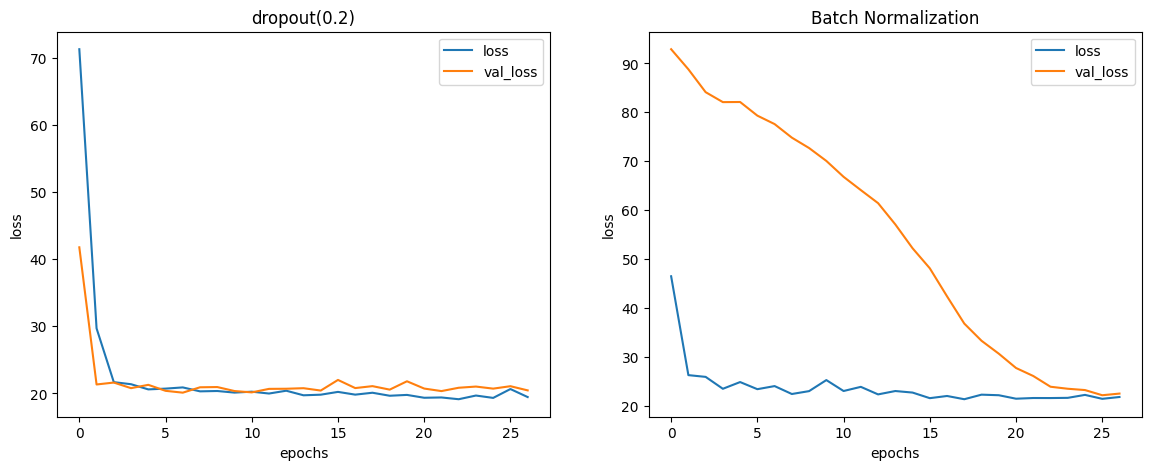

In [57]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))
df1 = pd.DataFrame(history1.history)[['loss', 'val_loss']]
df2 = pd.DataFrame(history2.history)[['loss', 'val_loss']]
df1.plot(ax=axes[0],xlabel="epochs",ylabel="loss",title="dropout(0.2)")
df2.plot(ax=axes[1],xlabel="epochs",ylabel="loss",title="Batch Normalization")

plt.show()

( $\Sigma, \mu$ の乱数生成範囲 )

In [60]:
Sig_lim=20;mu_lim=20
a=gene_data(hist_gene_int,Sig_lim=Sig_lim,mu_lim=mu_lim,gene_size=10,multi=100)

In [62]:
Sig_lim=30;mu_lim=20
a=gene_data(hist_gene_int,Sig_lim=Sig_lim,mu_lim=mu_lim,gene_size=10,multi=100)

In [63]:
Sig_lim=30;mu_lim=30
a=gene_data(hist_gene_int,Sig_lim=Sig_lim,mu_lim=mu_lim,gene_size=10,multi=100)

/mnt/c/file/github/fbnn/FBNN2d.py:15: RuntimeWarning: overflow encountered in exp
  return np.exp(num)


OverflowError: cannot convert float infinity to integer

In [64]:
Sig_lim=40;mu_lim=20
a=gene_data(hist_gene_int,Sig_lim=Sig_lim,mu_lim=mu_lim,gene_size=10,multi=100)

In [66]:
Sig_lim=50;mu_lim=20
a=gene_data(hist_gene_int,Sig_lim=Sig_lim,mu_lim=mu_lim,gene_size=10,multi=100)

/mnt/c/file/github/fbnn/FBNN2d.py:15: RuntimeWarning: overflow encountered in exp
  return np.exp(num)


OverflowError: cannot convert float infinity to integer

# true+int

In [67]:
(x_train1,y_train1) = gene_data(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=500,multi=100)
(x_train2,y_train2) = gene_data(hist_gene_true,Sig_lim=20,mu_lim=20,gene_size=500,multi=100)

test_data=[gene_data(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100) for _ in range(5)]

In [68]:
model1 = set_model(n_hidden=hidden,n_layer=layer,print_summary=False)
model2 = set_model(n_hidden=hidden,n_layer=layer,print_summary=False)

history1 =\
    model1.fit(x_train1, y_train1, verbose=0, validation_split=0.2,
                epochs=epochs,batch_size=batch_size,shuffle=True)

history2 =\
    model2.fit(x_train2, y_train2, verbose=0, validation_split=0.2,
                epochs=epochs,batch_size=batch_size,shuffle=True)

score1 = [model1.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score2 = [model2.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]

score1=np.mean(score1,axis=0)
score2=np.mean(score2,axis=0)

for name,score in [("int+int",score1),("true+int",score2)]:
    print(name)
    print('Test loss:', score[0])
    print('Test mae:', score[1])

int+int
Test loss: 22.92617073059082
Test mae: 3.6743194103240966
true+int
Test loss: 23.59635696411133
Test mae: 3.7383182048797607


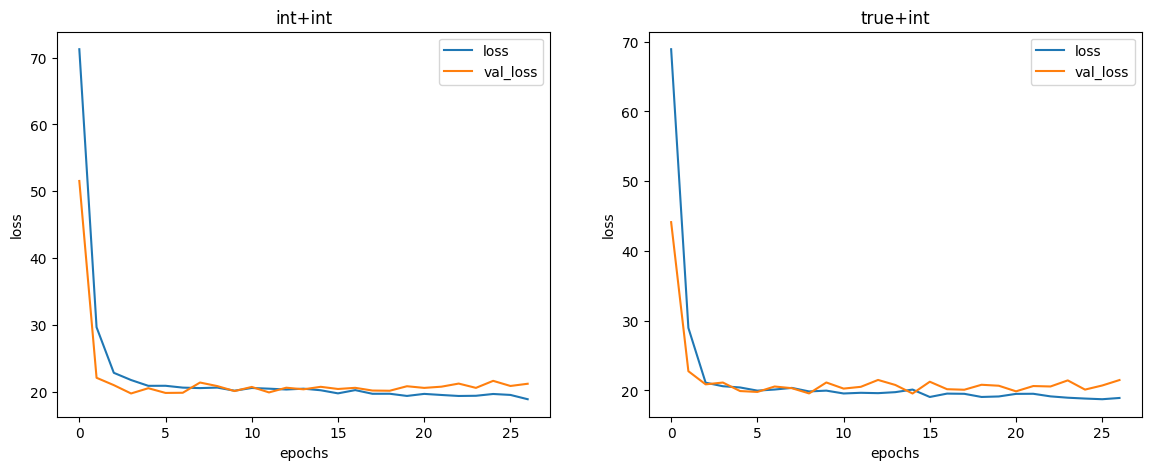

In [69]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))
df1 = pd.DataFrame(history1.history)[['loss', 'val_loss']]
df2 = pd.DataFrame(history2.history)[['loss', 'val_loss']]
df1.plot(ax=axes[0],xlabel="epochs",ylabel="loss",title="int+int")
df2.plot(ax=axes[1],xlabel="epochs",ylabel="loss",title="true+int")

plt.show()

# データの正規化
gene_data_Normalize()

In [5]:
(x_train1,y_train1) = gene_data(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=500,multi=100)
test_data1=[gene_data(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100) for _ in range(5)]

(x_train2,y_train2) = gene_data_Normalize(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=500,multi=100,center=np.pi)
test_data2=[gene_data_Normalize(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100,center=np.pi) for _ in range(5)]


In [10]:
model1 = set_model(n_hidden=hidden,n_layer=layer,print_summary=False)
model2 = set_model(n_hidden=hidden,n_layer=layer,print_summary=False)

history1 =\
    model1.fit(x_train1, y_train1, verbose=0, validation_split=0.2,
                epochs=epochs,batch_size=batch_size,shuffle=True)

history2 =\
    model2.fit(x_train2, y_train2, verbose=0, validation_split=0.2,
                epochs=epochs,batch_size=batch_size,shuffle=True)

score1 = [model1.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data1]
score2 = [model2.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data2]

score1=np.mean(score1,axis=0)
score2=np.mean(score2,axis=0)

for name,score in [("non Normalize",score1),("Normalize",score2)]:
    print(name)
    print('Test loss:', score[0])
    print('Test mae:', score[1])

# non Normalize
# Test loss: 24.211975860595704
# Test mae: 3.863871955871582
# Normalize
# Test loss: 19.182588005065917
# Test mae: 3.3477777004241944

non Normalize
Test loss: 22.27345390319824
Test mae: 3.642666959762573
Normalize
Test loss: 19.790247535705568
Test mae: 3.3931246280670164


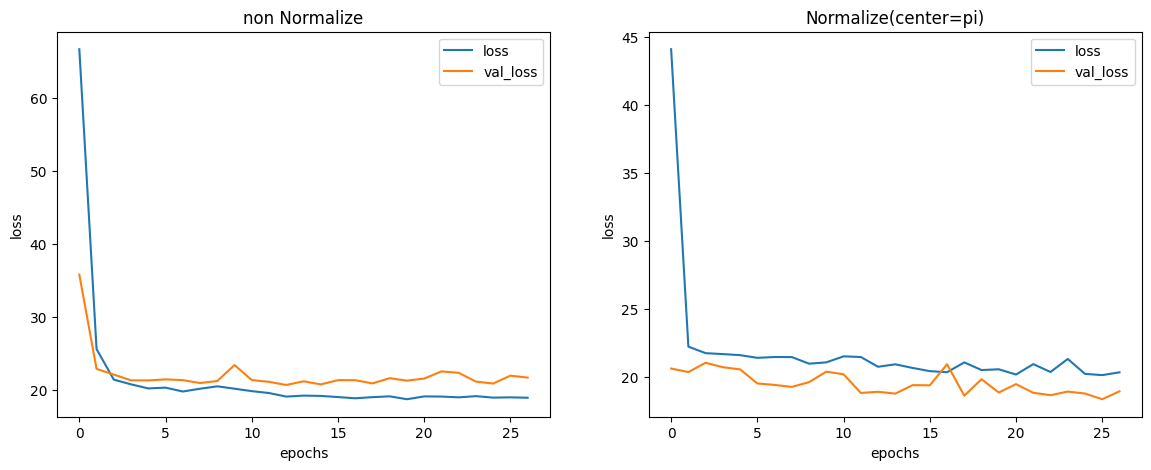

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))
df1 = pd.DataFrame(history1.history)[['loss', 'val_loss']]
df2 = pd.DataFrame(history2.history)[['loss', 'val_loss']]
df1.plot(ax=axes[0],xlabel="epochs",ylabel="loss",title="non Normalize")
df2.plot(ax=axes[1],xlabel="epochs",ylabel="loss",title="Normalize(center=pi)")

plt.show()

# LeakyReLU

In [83]:
(x_train,y_train) = gene_data_Normalize(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=500,multi=100,center=np.pi)
test_data = [gene_data_Normalize(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100,center=np.pi) for _ in range(5)]

In [91]:
model1 = set_model(n_hidden=hidden,n_layer=layer,print_summary=False)
model2 =\
    set_model_LeakyReLU(n_hidden=hidden,n_layer=layer,print_summary=False,leaky_alpha=0.05)

history1 =\
    model1.fit(x_train, y_train, verbose=0, validation_split=0.2,
                epochs=epochs,batch_size=batch_size,shuffle=True)

history2 =\
    model2.fit(x_train, y_train, verbose=0, validation_split=0.2,
                epochs=epochs,batch_size=batch_size,shuffle=True)

score1 = [model1.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score2 = [model2.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]

score1=np.mean(score1,axis=0)
score2=np.mean(score2,axis=0)

for name,score in [("ReLU",score1),("LeakyReLU",score2)]:
    print(name)
    print('Test loss:', score[0])
    print('Test mae:', score[1])

ReLU
Test loss: 18.921332168579102
Test mae: 3.4331130981445312
LeakyReLU
Test loss: 18.25060043334961
Test mae: 3.3449470520019533


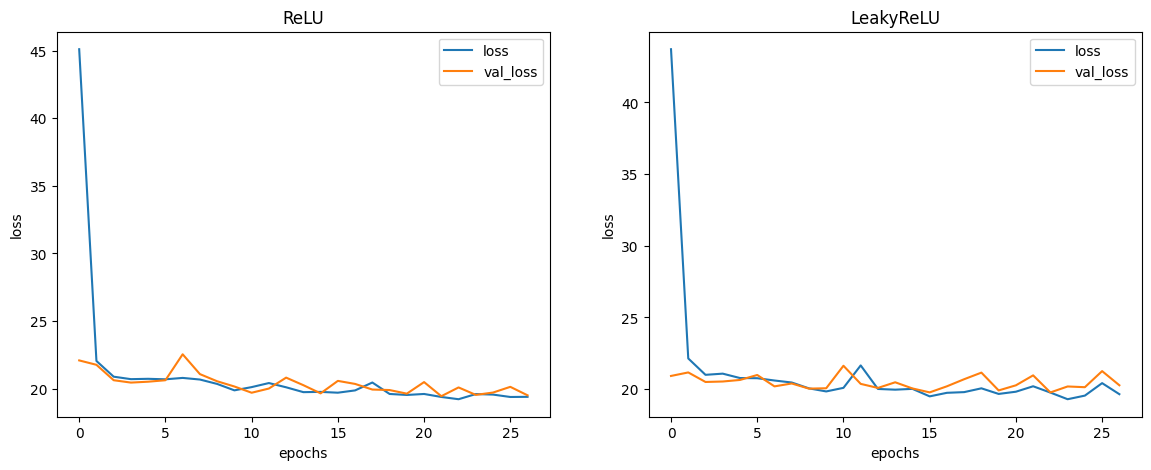

In [92]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))
df1 = pd.DataFrame(history1.history)[['loss', 'val_loss']]
df2 = pd.DataFrame(history2.history)[['loss', 'val_loss']]
df1.plot(ax=axes[0],xlabel="epochs",ylabel="loss",title="ReLU")
df2.plot(ax=axes[1],xlabel="epochs",ylabel="loss",title="LeakyReLU")

plt.show()

In [98]:
(x_train,y_train) = gene_data_Normalize(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=500,multi=100,center=np.pi)
test_data = [gene_data_Normalize(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100,center=np.pi) for _ in range(10)]

for leaky_alpha in [0.,0.01,0.05,0.1,0.3,0.6]:
    model =set_model_LeakyReLU(n_hidden=hidden,n_layer=layer,print_summary=False,leaky_alpha=leaky_alpha)

    model.fit(x_train, y_train, verbose=0, validation_split=0.2,
                epochs=epochs,batch_size=batch_size,shuffle=True)

    scores = [model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
    score = np.mean(scores,axis=0)

    print("leaky_alpha=%.2f: Average loss, Average mae: %f, %f" % (leaky_alpha, score[0], score[1]))

leaky_alpha=0.00: Average loss, Average mae: 17.701184, 3.187867
leaky_alpha=0.01: Average loss, Average mae: 18.031155, 3.226415
leaky_alpha=0.05: Average loss, Average mae: 18.906626, 3.361338
leaky_alpha=0.10: Average loss, Average mae: 19.090397, 3.319327
leaky_alpha=0.30: Average loss, Average mae: 19.187673, 3.394402
leaky_alpha=0.60: Average loss, Average mae: 18.430193, 3.292303


In [99]:
layers=range(1,11)
hiddens=range(50,1501,50)
res=[]
for layer in layers:
    print('\nlayer:',layer,'\nhidden:',end=" ")
    for hidden in hiddens:
        model=set_model_LeakyReLU(n_hidden=hidden,n_layer=layer,print_summary=False,leaky_alpha=0.01)
        model.fit(x_train, y_train, verbose=0, epochs=10, shuffle=True, validation_split=0.2
                    # ,batch_size=30,validation_data=(x_test, y_test)
                    )
        scores = [model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
        print(hidden, end=" ")
        score = np.mean(scores,axis=0)
        res.append([layer,hidden,score[0],score[1]])


layer: 1 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 
layer: 2 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 
layer: 3 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 
layer: 4 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 
layer: 5 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 
layer: 6 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 
layer: 7 
hidden: 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 11

In [100]:
data4 = pd.DataFrame(res, columns=["layer","hidden","loss(mse)","mae"])
display(data4.sort_values("loss(mse)"))
display(data4.sort_values("mae"))

,layer,hidden,loss(mse),mae
168,6,950,18.307375,3.285318
85,3,1300,18.320910,3.281757
143,5,1200,18.429147,3.291539
142,5,1150,18.464969,3.270613
137,5,900,18.468279,3.281713
...,...,...,...,...
4,1,250,34.609178,4.452371
3,1,200,39.320512,4.714592
2,1,150,48.815315,5.233743
1,1,100,60.889412,5.842896


,layer,hidden,loss(mse),mae
115,4,1300,18.652024,3.266481
142,5,1150,18.464969,3.270613
226,8,850,18.528139,3.274125
267,9,1400,18.759370,3.278351
176,6,1350,18.503495,3.279906
...,...,...,...,...
4,1,250,34.609178,4.452371
3,1,200,39.320512,4.714592
2,1,150,48.815315,5.233743
1,1,100,60.889412,5.842896


# 最適化関数の選択

In [5]:
(x_train,y_train) = gene_data_Normalize(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=500,multi=100,center=np.pi)
test_data = [gene_data_Normalize(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100,center=np.pi) for _ in range(5)]

adam-3 
mean loss, mean mae: 19.912252, 3.433495
1: Test loss, Test mae: 24.901722, 3.813121
2: Test loss, Test mae: 13.315851, 2.802466
3: Test loss, Test mae: 20.515442, 3.660605
4: Test loss, Test mae: 16.598684, 3.192445
5: Test loss, Test mae: 24.229563, 3.698836
adam-2 
mean loss, mean mae: 20.792600, 3.510022
1: Test loss, Test mae: 26.169209, 3.956400
2: Test loss, Test mae: 14.158205, 2.851481
3: Test loss, Test mae: 21.437519, 3.698795
4: Test loss, Test mae: 17.141684, 3.266113
5: Test loss, Test mae: 25.056385, 3.777320
sgd-3 
mean loss, mean mae: 20.626123, 3.515045
1: Test loss, Test mae: 24.860327, 3.815036
2: Test loss, Test mae: 14.247950, 2.900165
3: Test loss, Test mae: 21.001822, 3.737421
4: Test loss, Test mae: 17.507711, 3.287854
5: Test loss, Test mae: 25.512806, 3.834748
rms-3 
mean loss, mean mae: 23.309717, 3.619973
1: Test loss, Test mae: 25.132168, 3.816787
2: Test loss, Test mae: 28.055065, 3.578468
3: Test loss, Test mae: 22.083212, 3.770554
4: Test loss, 

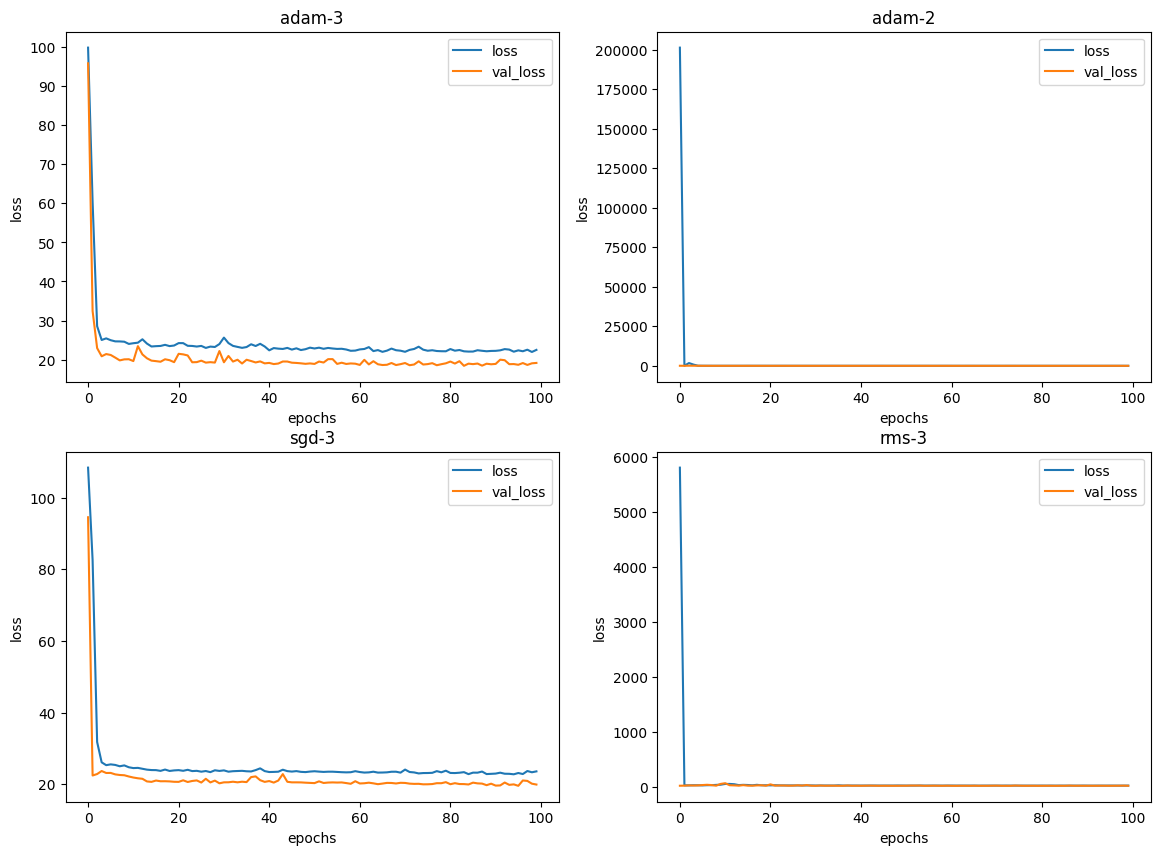

In [11]:
adam1 = 'adam' # lr=0.001
adam2 = optimizers.Adam(learning_rate=0.01)
sgd = optimizers.SGD(learning_rate=1e-3, momentum=0.9)
rms = optimizers.RMSprop(learning_rate=0.001)

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(14, 10))

for (optimizer,name,(i,j)) in [(adam1,"adam-3",(0,0)),(adam2,"adam-2",(0,1)),(sgd,"sgd-3",(1,0)),(rms,"rms-3",(1,1))]:

    model = set_model_LeakyReLU(optimizer=optimizer,n_hidden=900,n_layer=8,print_summary=False,leaky_alpha=0.01)

    history = model.fit(x_train, y_train, verbose=0,
                        epochs=100, validation_split=0.2, shuffle=True
                        # batch_size=30,validation_data=(x_test, y_test)
                        )

    scores = [model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
    score = np.mean(scores,axis=0)
    print(name,"\nmean loss, mean mae: %f, %f" % (score[0], score[1]))
    for n in range(len(scores)):
        print("%d: Test loss, Test mae: %f, %f" % (n+1, scores[n][0], scores[n][1]))

    df = pd.DataFrame(history.history)[['loss', 'val_loss']]
    df.plot(ax=axes[i,j],xlabel="epochs",ylabel="loss",title=name)

plt.show()